## Task III - Studying the Impact of Data Pre-processing and Outlier Removal on the Prediction Accuracy

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%run Task_I.ipynb

### Task 3.2
Perform a comparative study to find out, for each of the regression methods, which of the pre-processing method performs best on X1,...,X7. Which pre-processing method works well for all regression methods?

In [4]:
def NMAE_reg(features,labels):
    reg = LinearRegression(fit_intercept=True)
    reg.fit(features, labels)
    return ((1/np.mean(labels))*mean_absolute_error(reg.predict(features),labels))

In [6]:
print(NMAE_reg(X_KV,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_columns_l2norm ,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_rows_l2norm ,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_columns_range,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_rows_range,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_columns_scaled,Y_KV['ReadsAvg']),
NMAE_reg(X_KV_rows_scaled ,Y_KV['ReadsAvg']))

0.016352928606288328 0.01661000207216561 0.01632909493400075 0.016451538148400856 0.016355733531246912 0.01635017665562118 0.016321634147124026


In [7]:
print(NMAE_reg(X_VoD,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_columns_l2norm,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_rows_l2norm,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_columns_range,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_rows_range,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_columns_scaled,Y_VoD['DispFrames']),
NMAE_reg(X_VoD_rows_scaled,Y_VoD['DispFrames']))

0.10125195377516152 0.10712271072888761 0.10169430273784008 0.10145724243311449 0.10136633121114674 0.10129533615991955 0.10171727466457231


In [9]:
def NMAE_rand_forest(features,labels):
    rand_forest = RandomForestRegressor(n_estimators=20, max_depth=10) #Criterion = 'absolute_error' takes forever
    rand_forest.fit(features, labels)
    return ((1/np.mean(labels))*mean_absolute_error(rand_forest.predict(features),labels))

In [ ]:
print(NMAE_rand_forest(X_KV,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_columns_l2norm,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_rows_l2norm,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_columns_range,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_rows_range,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_columns_scaled,Y_KV['ReadsAvg']),
NMAE_rand_forest(X_KV_rows_scaled,Y_KV['ReadsAvg']))

In [ ]:
print(NMAE_rand_forest(X_VoD,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_columns_l2norm ,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_rows_l2norm,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_columns_range,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_rows_range,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_columns_scaled,Y_VoD['DispFrames']),
NMAE_rand_forest(X_VoD_rows_scaled,Y_VoD['DispFrames']))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def NMAE_NN(features,labels):
    model = keras.Sequential()
    model.add(layers.Dense(10, input_dim=features.shape[1], activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mse', optimizer=opt) #loss='mean_squared_error'
    model.fit(features, labels, batch_size=64, epochs=5000, verbose=1)
    return ((1/np.mean(labels))*mean_absolute_error(model.predict(features),labels))

In [ ]:
print(NMAE_NN(X_KV,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_columns_l2norm,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_rows_l2norm,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_columns_range,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_rows_range,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_columns_scaled,Y_KV['ReadsAvg']),
NMAE_NN(X_KV_rows_scaled,Y_KV['ReadsAvg']))

In [ ]:
NMAE_NN(X_VoD,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_columns_l2norm,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_rows_l2norm,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_columns_range,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_rows_range,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_columns_scaled,Y_VoD['DispFrames'])
NMAE_NN(X_VoD_rows_scaled,Y_VoD['DispFrames'])

### Task 3.3 
Detect and remove outliers. Take the design matrix whose feature columns are standardized (see above). We call a sample an outlier when one of its components has an absolute value larger than a given threshold T. Compute and plot the number of outliers of your data set in function of T.
The idea is that once the threshold T is decided, all samples with components whose absolute values are larger than T are removed from the data set.

In [11]:
X_KV_columns_scaled = pd.DataFrame(X_KV_columns_scaled)
X_VoD_columns_scaled = pd.DataFrame(X_VoD_columns_scaled) 

In [12]:
# Function that counts the number of outliers depending on threshold
def count(features,thr): 
    counter = 0
    features = features.T
    for col in features:
        if any(np.absolute(features[col]) >= thr):
            counter += 1
    return counter

In [ ]:
#Plot of the number of outliers in function of T.

points = np.linspace(0,60,30) #Sample 30 points to improve computational time 

def outliers_plot(features): 
    counter = []
    for thr in points:
        counter.append(count(features,thr))
    return counter

plt.figure(figsize=(7, 3))
plt.plot(points, outliers_plot(X_KV_columns_scaled))
plt.plot(points, outliers_plot(X_VoD_columns_scaled))
#plt.title('',fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("Number of outliers")
plt.legend(['JNSM_KV_flashcrowd_1','JNSM_VoD_flashcrowd_1'])
plt.xlim([0,60])
plt.ylim([0,20000])
#plt.savefig('Nr_outliers.png',bbox_inches='tight')
plt.show()

### Task 3.4
Investigate the error of a regressor in function of T for your data set. Start with the original data set S and produce reduced data sets S1, ..., S10 for T = 10, 20, 30, ...100. For each Si use linear regression and random forest methods and evaluate the learned models. Assess the effect of outlier removal for both methods by producing a plot that shows the error (NMAE) in function of T.

In [5]:
# Function that removes outliers from the features matrix as well as the target scores
# Note: Input is of the format pd.DataFrame
def outlier_detection(features, labels, thr): 
    features = features.T
    for col in features:
        if any(np.absolute(features[col]) >= thr):
            features = features.drop([col],axis=1)
            labels = labels.drop([col],axis=0)
    return features.T, labels #Returns reduced feature matrix and target scores

In [ ]:
#Define a function which returns predictions of a Linear Regression model
def prediction_reg_KV(thr):
    reg = LinearRegression(fit_intercept=True).fit(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0],outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1])                                                
    return reg.predict(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0])

errors_reg_KV =[]

#For each threshold value iterate through the NMAE
for thr in range(0,101,10):
    if outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0].shape[0] >= 1: 
        errors_reg_KV.append((1/np.mean(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1]))*mean_absolute_error(prediction_reg_KV(thr),outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1]))
    else: 
        errors_reg_KV = errors_reg_KV
        
%store errors_reg_KV

In [9]:
%store -r errors_reg_KV

In [13]:
#Define a function which returns predictions of a Linear Regression model
def prediction_reg_VoD(thr):
    reg = LinearRegression(fit_intercept=True).fit(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0],outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1])                                                
    return reg.predict(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0])

errors_reg_VoD =[]

#For each threshold value iterate through the NMAE
for thr in range(10,101,10):
    if outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0].shape[0] >= 1: 
        errors_reg_VoD.append((1/np.mean(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1]))*mean_absolute_error(prediction_reg_VoD(thr),outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1]))
    else: 
        errors_reg_VoD = errors_reg_VoD
        
%store errors_reg_VoD

KeyboardInterrupt: 

In [ ]:
#Function that returns error directly

#def errors_reg(features, labels):
    
    # Function that removes outliers from the features matrix as well as the target scores
    # Note: Input is of the format pd.DataFrame
#    def outlier_detection(thr): 
#        nonlocal features
#        nonlocal labels
#        
#        features = features.T
#        for col in features:
#            if any(np.absolute(features[col]) >= thr):
#                features = features.drop([col],axis=1)
#                labels = labels.drop([col],axis=0)
#        reg = LinearRegression(fit_intercept=True).fit(features,labels)                                                
#        prediction = reg.predict(features)
#        return features.T, labels, prediction
#    errors_reg =[]
#    for thr in range(0,101,10):
#         if outlier_detection(thr)[0].shape[0] >= 1: 
#            errors_reg.append((1/np.mean(outlier_detection(thr)[1]))*mean_absolute_error(outlier_detection(thr)[2],outlier_detection(thr)[1]))
#        else: 
#            errors_reg = errors_reg
#    return errors_reg

In [ ]:
#Errors for both datasets
#errors_reg_KV = errors_reg(features_KV_columns_scaled, Y_KV['ReadsAvg'])
#%store errors_reg_KV

#errors_reg_VoD = errors_reg(features_VoD_columns_scaled, Y_VoD['DispFrames'])
#%store errors_reg_VoD

In [6]:
#Random Forest

#Define a function which returns predictions of a Linear Regression model
def prediction_rf_KV(thr):
    rand_forest = RandomForestRegressor(n_estimators=15, max_depth=10)
    rand_forest.fit(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0],outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1])                                                
    return rand_forest.predict(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0])

errors_rf_KV =[]

#For each threshold value iterate through the NMAE
for thr in range(10,101,10):
    if outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[0].shape[0] >= 1: 
        errors_rf_KV.append((1/np.mean(outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1]))*mean_absolute_error(prediction_rf_KV(thr),outlier_detection(X_KV_columns_scaled,Y_KV['ReadsAvg'],thr)[1]))
    else: 
        errors_rf_KV = errors_rf_KV
        
%store errors_rf_KV

Stored 'errors_rf_KV' (list)


In [7]:
print(errors_rf_KV)

[0.014899336179967958, 0.01551940712081796, 0.01573018510910617, 0.015905654749923528, 0.0160936969421633, 0.0159320438076753, 0.015958347429305547, 0.016074424251368954, 0.01617289049737537, 0.016189498853844964]


In [ ]:
%store -r errors_rf_KV

In [ ]:
#Define a function which returns predictions of a Linear Regression model
def prediction_rf_VoD(thr):
    rand_forest = RandomForestRegressor(n_estimators=15, max_depth=10)
    rand_forest.fit(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0],outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1])                                                
    return rand_forest.predict(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0])

errors_rf_VoD =[]

#For each threshold value iterate through the NMAE
for thr in range(0,101,10):
    if outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[0].shape[0] >= 1: 
        errors_rf_VoD.append((1/np.mean(outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1]))*mean_absolute_error(prediction_rf_VoD(thr),outlier_detection(X_VoD_columns_scaled,Y_VoD['DispFrames'],thr)[1]))
    else: 
        errors_rf_VoD = errors_rf_VoD
        
%store errors_rf_VoD

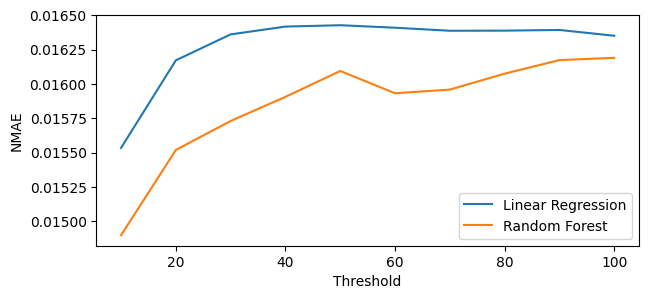

In [12]:
#Plots
x = np.arange(10,101,10)

plt.figure(figsize=(7, 3))
plt.plot(x, errors_reg_KV)
plt.plot(x, errors_rf_KV)
#plt.title('JNSM_KV_flashcrowd_1',fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("NMAE")
plt.legend(['Linear Regression','Random Forest'])
plt.savefig('NMAE_KV',bbox_inches='tight')
plt.show()

In [ ]:
#Plots
x = np.arange(10,101,10)

plt.figure(figsize=(7, 3))
plt.plot(x, errors_reg_VoD)
plt.title('Random Forest - dataset JNSM_KV_flashcrowd_1 ',fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("NMAE")
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(x, errors_rf_VoD)
plt.title('Random Forest - JNSM_VoD_flashcrowd_1',fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("NMAE")
plt.show()